# Reinforcement Learning

So far we have grouped Machine Learning into Supervised Learning and
Unsupervised Learning. There is a third branch of Machine Learning called
Reinforcement Learning. It is motivated by the way humans are belived to learn,
by **interacting with their environment**.

The goal of Reinforcement Learning is to map actions to situations (states) so as to 
**maximize a numerical reward signal**.

https://www.youtube.com/watch?v=kopoLzvh5jY

## How does it work?

We define an **agent**, that takes **actions**. These actions lead to a **reward** and influence the **state** of the environment.

![title](SAR.jpg)

## Problem Definition

Reinforcement Learning problems are commonly defined as Markov Decision Processes (MDP) that are defined by a **state space** *S*, an **action space** *A*, a **state transition function** *P*, a **reward function** *r* and a **discount factor** *$\gamma$*.

![](mdp.png)

### State Space *S*

$S = \{s_1, s_2, ..., s_n\}$

All n possible states of the environment.

### Action Space *A*

$A = \{a_1, a_2, ..., a_m\}$

All m possible actions of the agent.

### State Transition Function *P*

$P(s', r|s, a)$

The probability distribution of entering state $s'$ and receiving reward *r* after choosing action *a* in state *s*. It defines the dynamics of the MDP.

### Reward Function

$R(a, s)$

The reward of the agent for choosing action a in state s.

### Discount Factor

$\gamma$

The factor with which future rewards are discounted. Usually a discount factor $\gamma < 1$ is used to indicate that future reward is worth less than current reward.

## Goal

Find a policy $\pi(a|s)$ that maximizes the total expected reward $V_\pi(s) = E[G_t|S_t = s] \forall s$ where $G_t = R_{t+1} + \gamma * R_{t+2} ... + \gamma^{p-1} * R_{t+p}$ is the **return**.

#### Return

$G_t = R_{t+1} + \gamma * R_{t+2} ... + \gamma^{p-1} * R_{t+p}$

The return at time t is the cumulated future discounted return.

#### Policy

$\pi(a|s)$

Is a mapping of a single action to every state of the environment.

* How probable is it for an agent to select any action from a given state? **Policies**
* How good is any given action or any given state for an agent? **Value functions**

**Value functions**

#### State-Value Function

$V_\pi(s) = E[G_t|S_t=s]$

The state-value function for policy $\pi(a|s)$ is the total expected return from being in state S=s and following the policy $\pi(a|s)$.

#### Action-Value Function

$Q_\pi(s, a) = E[G_t|S_t=s, A_t=a]$

The action-value function for policy $\pi(a|s)$ is the total expected return from being in state S=s, chosing action A=a and thereafter following policy $\pi(a|s)$.

One important property of both value functions is that they are **recursive relationships**. E.g.


$Q_\pi(s, a) = E[G_t|S_t=s, A_t=a] = $

$E[R_{t+1} + \gamma*G_{t+1}|S_t=s, A_t=a] = $

$E[R_{t+1}|S_t=s, A_t=a] + E[\gamma*V_\pi(s')|S_t+1=s']$

This is called the **Bellman equation** and is central to Reinforcement Learning.

## Summary

We want to find a policy that optimizes the return (sum of discounted future rewards) of the agent.

Let's look at an example.

Assumptions:

- Mouse can go left, right, up and down
- If the mouse finds cheese, either in the upper left corner or in the lower right corner, the environment terminates
- The mouse prefers two blocks of cheese over one block of cheese

![](MOUSE_GRID.svg)

### QUESTION:
So what are state space, action space, state transition function, reward function and discount factor?

---

## How do we find the policy?

1. Dynamic Programming: Do not learn from the environment and require knowledge of the dynamics and the rewards
- Monte Carlo Methods: Learn directly from the environment but only after the final outcome is observed
- Temporal Difference Learning: Learn directly from the environment and update estimates from other learned estimates
- Policy Gradients: Approximate the value function through a parametrized function (Deep Reinforcement Learning)

## Drawbacks

* Credit assignment Problem
* Exploration vs. Exploitation
* Sparse reward symbol

---

### Implement it in practice using OpenAI's Gym
* A handy library for learning about RL - https://gym.openai.com/

`pip install gym`

In [1]:
import gym
import time
import numpy as np

---

### Let's work on the cartpole problem
#### First we make an environment in which the agent can be trained

In [2]:
env = gym.make('CartPole-v1')

In [3]:
env.reset()
for i in range(1000):
    env.render()
    obs, reward, done, _ = env.step(env.action_space.sample()) # take a random action
    time.sleep(0.08)
    if done:
        print(f'We survived {i} steps')
        env.reset()
        break
env.close()

We survived 35 steps


#### Now we implement the agent-environment loop
* Start the process by resetting the environment
* And return an initial observation

In [4]:
initial_obs = env.reset()

In [5]:
initial_obs

array([-0.0264197 , -0.02788114,  0.00047485, -0.00742791])

\[position of cart, velocity of cart, angle of pole, rotation rate of pole\]

We can achieve the same thing by taking an action - in this case a  `step` in a given direction, 0 for left and 1 for right

In [6]:
obs = env.step(0) # move cart left 
obs, reward, done, _ = env.step(1)

We can already use the `done` boolean to work out if we can stop the loop

In [7]:
obs, reward, done, _

(array([-0.03143752, -0.02789261,  0.00603439, -0.0071752 ]), 1.0, False, {})

And use `sample` the `action_space` space to randomly pick an action

In [8]:
random_step = env.action_space.sample()

And `render` the environment to see what our cart is doing

**OK, but we need to build an RL agent. What next?**

First, lets try to build the simplest RL agent:
* If the pole is left, move left
* If the pole is right, move right

In [9]:
def simple_rl(env):
    #reset the environment and taking an initial step
    obs = env.reset()
    
     #loop over this process until I die
    for i in range(1000):
        
    #measure: is my pole angled to the left, or the right
    #action: if pole is left, move cart left. if pole is right, move right
        if obs[2] < 0:
            action = 0
        elif obs[2] > 0:
            action = 1
        elif obs[2] == 0:
            print('omgomgomg were amazing')
            break
            
        obs, reward, done, _ = env.step(action)
        env.render()
        time.sleep(0.08) #to make the video play at a normal rate
        if done:
            print(f'iterations survived: {i}')
            env.close()
            break

In [ ]:
#benchmark for a dumb rl agent = 50

In [10]:
simple_rl(env)

iterations survived: 37


### Let's look at some evolutionary algorithm

In [11]:
import numpy as np

In [12]:
np.random.rand(4) *2 -1

array([-0.50146414, -0.39732256,  0.69022968, -0.54436766])

In [13]:
parameters = np.random.rand(4) * 2 - 1

In [14]:
parameters

array([ 0.97265271, -0.2421153 , -0.16512412, -0.95989455])

In [15]:
observation = env.reset()
observation

array([-0.01889151, -0.02661885,  0.01797036, -0.01824947])

In [16]:
np.matmul(parameters, observation)

0.002620181811704621

In [17]:
action = 0 if np.matmul(parameters,observation) < 0 else 1
action

1

In [26]:
def run_episode(env, parameters, range_=10000, render=False):  
    observation = env.reset()
    totalreward = 0
    
    for _ in range(range_):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if render:
            env.render()
            time.sleep(0.08)
        if done:
            print('yop')
            break
            
    env.close()
    return totalreward

In [27]:
run_episode(env, parameters, render=True)

yop


10.0

#### Random Search

In [28]:
max_timesteps = 500
bestparams = None  
bestreward = 0  
all_rewards = []
for i in range(1000):  
    parameters = np.random.rand(4) * 2 - 1
    reward = run_episode(env,parameters, range_=max_timesteps)
    all_rewards.append(reward)
    
    if reward > bestreward:
        bestreward = reward
        bestparams = parameters
        # considered solved if the agent lasts 200 timesteps
        if reward == max_timesteps:
            print(f'{i} episodes required to reach a reward of {max_timesteps}')
            break

yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
yop
35 episodes required to reach a reward of 500


In [29]:
all_rewards

[9.0,
 8.0,
 118.0,
 10.0,
 141.0,
 11.0,
 8.0,
 9.0,
 9.0,
 36.0,
 9.0,
 10.0,
 103.0,
 58.0,
 9.0,
 9.0,
 77.0,
 10.0,
 10.0,
 88.0,
 10.0,
 8.0,
 10.0,
 9.0,
 9.0,
 11.0,
 80.0,
 10.0,
 10.0,
 167.0,
 161.0,
 65.0,
 8.0,
 10.0,
 188.0,
 500.0]

In [30]:
import matplotlib.pyplot as plt

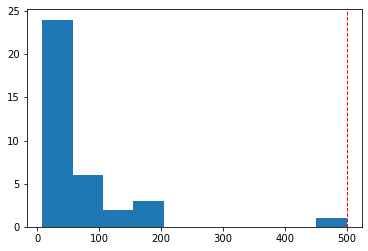

In [31]:
plt.hist(all_rewards)
plt.axvline(max_timesteps, color='r', linestyle='dashed', linewidth=1)
plt.show()
None

In [32]:
bestparams

array([-0.0900372 , -0.49474541,  0.89044071,  0.72721733])

In [33]:
bestreward

500.0

In [34]:
run_episode(env, bestparams, max_timesteps, True)

yop


500.0

---

obs = env.reset()
done = False
i = 0
total_rewards = []
while not done:
    i += 1
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    total_rewards.append(rewards)
    time.sleep(0.08)
    env.render()
print(f'{i} episodes')

---

#### A Policy-Based Approach using non-Deep methods

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
def collect_training_data(env):
    
    """build a policy space, linking of states to actions and associated rewards"""
    number_of_games = 200
    last_moves = 25
    observations = []
    actions = []

    for i in range(number_of_games):
        game_obs = []
        game_acts = []
        obs = env.reset()

        for j in range(1000):
            action = env.action_space.sample()
            obs, reward, done, _ = env.step(action)
            game_obs.append(obs)
            game_acts.append(action)

            if done:
                observations += game_obs[:-(last_moves+1)]
                actions += game_acts[1:-last_moves]
                break

    observations = np.array(observations)
    actions = np.array(actions)

    return observations, actions

In [37]:
def smart_rl(env, m):
    """now play the game with a trained rl agent"""
    #setup the game
    obs = env.reset()

    for i in range(1000):
        #start to play the game
        #model, tell me what to do next please
        obs = obs.reshape(-1,4)
        action = int(m.predict(obs))

        #take an according step
        obs,reward,done,_ = env.step(action)
        #visusalise my results
        env.render()
        #print(obs, reward)
        time.sleep(0.1)
        #find out if i died
        if done:
            print(f'iterations survived {i}')
            env.close()
            break

In [38]:
env = gym.make('CartPole-v1')
#collect training data
X,y = collect_training_data(env)
#instantiate our agent, and fit on the data
m = RandomForestClassifier()
m.fit(X,y)
#now play the game
smart_rl(env,m)

iterations survived 157


---

## Exercise: 

### DQN
* Can you implement a DQN with stable baselines?
* Have a go wiht the [installation instructions](https://stable-baselines.readthedocs.io/en/master/guide/install.html) but please **use a virtualenv and check pre-installation requirements!!** (big installation issues can occur, especially with tensorflow  -consider using **docker** for the installation, and **pytorch** for the Deep networks)

In [39]:
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines import DQN


env = DummyVecEnv([lambda: gym.make('CartPole-v1')])
model = DQN(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=10000)
model.save("deepq_cartpole")
del model # remove to demonstrate saving and loading
model = DQN.load("deepq_cartpole")

ModuleNotFoundError: No module named 'stable_baselines'